<a id='top'></a>

# Data Engineering of StrataBet Data
##### Notebook to engineer the event data provided by [StrataBet]( http://www.stratagem.co/)

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 13/12/2020<br>
Notebook last updated: 26/12/2020

![title](../../img/stratabet_logo.jpg)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Conclusion.

<b>This article was written with the aid of StrataData, which is property of [Stratagem Technologies](http://www.stratagem.co/). StrataData powers the [StrataBet Sports Trading Platform](http://www.stratabet.com/), in addition to [StrataBet Premium Recommendations](http://app.stratabet.com/recommendations).</b>

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook engineers  [StrataBet]( http://www.stratagem.co/) data for football matches in a variety of European leagues during the 16/17 and 17/18 seasons, using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/);
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster);
*    [kaggle.com/eddwebster](https://www.kaggle.com/eddwebster); and
*    [hackerrank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](../../img/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/fifa-league) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/B%29%20Data%20Engineering/Opta%20%23mcfcanalytics%20PL%202011-2012.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Data Dictionary](#section3.2)<br>
      3.    [Creating the DataFrame](#section3.3)<br>
      4.    [Initial Data Handling](#section3.4)<br>
      5.    [Export the Raw DataFrame](#section3.5)<br>         
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Columns of Interest](#section4.2)<br>
      3.    [String Cleaning](#section4.3)<br>
      4.    [Converting Data Types](#section4.4)<br>
      5.    [Export the Engineered DataFrame](#section4.5)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [2]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd    # version 1.0.3
import os    #  used to read the csv filenames
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os

# Working with JSON
import json
from pandas.io.json import json_normalize
from ast import literal_eval

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno    # visually display missing data

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print('Setup Complete')

Setup Complete


In [3]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
Seaborn: 0.10.0


### Defined Filepaths

In [4]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', )
data_dir = os.path.join(base_dir, 'data')
data_dir_fbref = os.path.join(base_dir, 'data', 'fbref')
data_dir_stratabet = os.path.join(base_dir, 'data', 'stratabet')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

### Notebook Settings

In [5]:
pd.set_option('display.max_columns', None)

---

<a id='section2'></a>

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook explores how to engineer [StrataBet]( http://www.stratagem.co/) Events data using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

The resulting engineered Datarame is exported as a CSV file. This data can be further analysed in Python, joined to other datasets, or explored using Tableau, PowerBI, Microsoft Excel.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

### <a id='#section3.1'>3.1. Introduction</a>
This StrataData has been made availble by [Stratagem Technologies](http://www.stratagem.co/). StrataData powers the [StrataBet Sports Trading Platform](http://www.stratabet.com/), in addition to [StrataBet Premium Recommendations](http://app.stratabet.com/recommendations).</b>

Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and cleaned in the Data Engineering section [Section 4](#section4).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

### <a id='#section3.2'>3.2. Chances</a>

#### <a id='#section3.2.1'>3.2.1. Data Dictionary</a>
The [StrataBet]( http://www.stratagem.co/) Events dataset has twelve features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `eventId`    | int64     |
| `subEventName`    | object     |
| `tags`    | object     |
| `playerId`    | int64     |
| `positions`    | object     |
| `matchId`    | int64     |
| `eventName`    | object     |
| `teamId`    | int64     |
| `matchPeriod`    | object     |
| `eventSec`    | float64     |
| `subEventId`    | object     |
| `id`    | int64     |

#### <a id='#section3.2.2'>3.2.2. Import Data</a>

In [6]:
# Combine individual csv files to form one DataFrame, df_raw, using glob
lst_files_chances = glob.glob(data_dir_stratabet + '/raw/chances/individual_competitions' + "/*.csv")    # Creates a list of all csv files

li = []    # pd.concat takes a list of DataFrames as an argument

for filename in lst_files_chances:
    df_raw_temp = pd.read_csv(filename, index_col=None, header=0)
    li.append(df_raw_temp)

df_stratabet_chances_raw = pd.concat(li, axis=0, ignore_index=True)    # ignore_index=True as we don't want pandas to try an align row indexes

#### <a id='#section3.2.3'>3.2.3. Initial Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [7]:
# Display the first 5 rows of the raw DataFrame, df_stratabet_chances_raw 
df_stratabet_chances_raw.head()

,index,competition,gsm_id,kickoffDate,kickoffTime,hometeam_team1,awayteam_team2,icon,chanceRating,team,type,time,player,location_x,location_y,bodyPart,shotQuality,defPressure,numDefPlayers,numAttPlayers,outcome,primaryPlayer,primaryType,primaryLocation_x,primaryLocation_y,secondaryPlayer,secondaryType
0,4684,GreSL,2355591,10/09/2016,13:00:00,Kerkyra,Platanias,poorchance,poorchance,Kerkyra,Open Play,24:43:00,D. Epstein,81,48,Left,3,5,2,0,Saved,-,-,-,-,-,-
1,4685,GreSL,2355591,10/09/2016,13:00:00,Kerkyra,Platanias,goodchance,goodchance,Kerkyra,Open Play,45:29:00,D. Epstein,27,60,Left,2,2,2,0,Defended,Thuram,Open Play Pass,-29,82,-,-
2,4686,GreSL,2355591,10/09/2016,13:00:00,Kerkyra,Platanias,poorchance,poorchance,Kerkyra,Open Play,44:34:00,S. Siontis,23,117,Right,2,1,4,1,Missed,-,-,-,-,-,-
3,4687,GreSL,2355591,10/09/2016,13:00:00,Kerkyra,Platanias,poorchance,poorchance,Platanias,Open Play,42:39:00,O. Gnjatic,-9,118,Left,1,1,3,1,Missed,G. Manousos,Open Play Pass,77,92,-,-
4,4688,GreSL,2355591,10/09/2016,13:00:00,Kerkyra,Platanias,goodchance,goodchance,Kerkyra,Open Play,40:46:00,D. Epstein,42,15,Left,2,5,2,0,Saved,-,-,-,-,-,-


In [8]:
# Display the last 5 rows of the raw DataFrame, df_stratabet_chances_raw 
df_stratabet_chances_raw.tail()

,index,competition,gsm_id,kickoffDate,kickoffTime,hometeam_team1,awayteam_team2,icon,chanceRating,team,type,time,player,location_x,location_y,bodyPart,shotQuality,defPressure,numDefPlayers,numAttPlayers,outcome,primaryPlayer,primaryType,primaryLocation_x,primaryLocation_y,secondaryPlayer,secondaryType
119143,33422,EngPr,2463091,12/03/2018,20:00:00,Stoke City,Manchester City,goodchance,goodchance,Manchester City,Open Play,41:13:00,L. Sane,45,42,Left,2,2,2,0,Missed,K. De Bruyne,Cross High,-69,48,Gabriel Jesus,Open Play Pass
119144,33424,EngPr,2463091,12/03/2018,20:00:00,Stoke City,Manchester City,greatchance,greatchance,Manchester City,Open Play,56:58:00,R. Sterling,-18,13,Left,3,4,2,0,Saved,David Silva,Open Play Pass,-36,86,L. Sane,Open Play Pass
119145,33418,EngPr,2463091,12/03/2018,20:00:00,Stoke City,Manchester City,poorchance,poorchance,Manchester City,Open Play,25:50:00,Fernandinho,3,97,Left,2,1,3,2,Missed,-,-,-,-,-,-
119146,33426,EngPr,2463091,12/03/2018,20:00:00,Stoke City,Manchester City,poorchance,poorchance,Manchester City,Open Play,57:48:00,R. Sterling,31,92,Right,2,1,4,1,Defended,L. Sane,Open Play Pass,-7,86,K. De Bruyne,Open Play Pass
119147,33427,EngPr,2463091,12/03/2018,20:00:00,Stoke City,Manchester City,poorchance,poorchance,Manchester City,Open Play,58:29:00,L. Sane,-27,107,Left,2,1,5,3,Missed,R. Sterling,Open Play Pass,17,88,David Silva,Open Play Pass


In [9]:
# Print the shape of the raw DataFrame, df_stratabet_chances_raw 
print(df_stratabet_chances_raw.shape)

(119148, 27)


In [10]:
# Print the column names of the raw DataFrame, df_stratabet_chances_raw 
print(df_stratabet_chances_raw.columns)

Index(['index', 'competition', 'gsm_id', 'kickoffDate', 'kickoffTime',
       'hometeam_team1', 'awayteam_team2', 'icon', 'chanceRating', 'team',
       'type', 'time', 'player', 'location_x', 'location_y', 'bodyPart',
       'shotQuality', 'defPressure', 'numDefPlayers', 'numAttPlayers',
       'outcome', 'primaryPlayer', 'primaryType', 'primaryLocation_x',
       'primaryLocation_y', 'secondaryPlayer', 'secondaryType'],
      dtype='object')


The dataset has six features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [11]:
# Data types of the features of the raw DataFrame, df_stratabet_chances_raw 
df_stratabet_chances_raw .dtypes

index                 int64
competition          object
gsm_id                int64
kickoffDate          object
kickoffTime          object
hometeam_team1       object
awayteam_team2       object
icon                 object
chanceRating         object
team                 object
type                 object
time                 object
player               object
location_x           object
location_y           object
bodyPart             object
shotQuality          object
defPressure          object
numDefPlayers        object
numAttPlayers        object
outcome              object
primaryPlayer        object
primaryType          object
primaryLocation_x    object
primaryLocation_y    object
secondaryPlayer      object
secondaryType        object
dtype: object

All six of the columns have the object data type. Full details of these attributes and their data types can be found in the [Data Dictionary](section3.3.1).

In [12]:
# Info for the raw DataFrame, df_stratabet_chances_raw 
df_stratabet_chances_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119148 entries, 0 to 119147
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   index              119148 non-null  int64 
 1   competition        119148 non-null  object
 2   gsm_id             119148 non-null  int64 
 3   kickoffDate        119148 non-null  object
 4   kickoffTime        119148 non-null  object
 5   hometeam_team1     119148 non-null  object
 6   awayteam_team2     119148 non-null  object
 7   icon               119148 non-null  object
 8   chanceRating       119148 non-null  object
 9   team               119148 non-null  object
 10  type               119148 non-null  object
 11  time               119148 non-null  object
 12  player             119148 non-null  object
 13  location_x         119148 non-null  object
 14  location_y         119148 non-null  object
 15  bodyPart           119148 non-null  object
 16  shotQuality        1

In [13]:
# Description of the raw DataFrame, df_stratabet_raw, showing some summary statistics for each numberical column in the DataFrame
df_stratabet_chances_raw.describe()

,index,gsm_id
count,119148.000000,1.191480e+05
mean,9941.664501,2.380177e+06
std,17678.010794,1.127321e+05
min,0.000000,2.237445e+06
25%,1580.000000,2.247140e+06
50%,3387.000000,2.404032e+06
75%,6534.000000,2.467501e+06
max,80263.000000,2.701477e+06


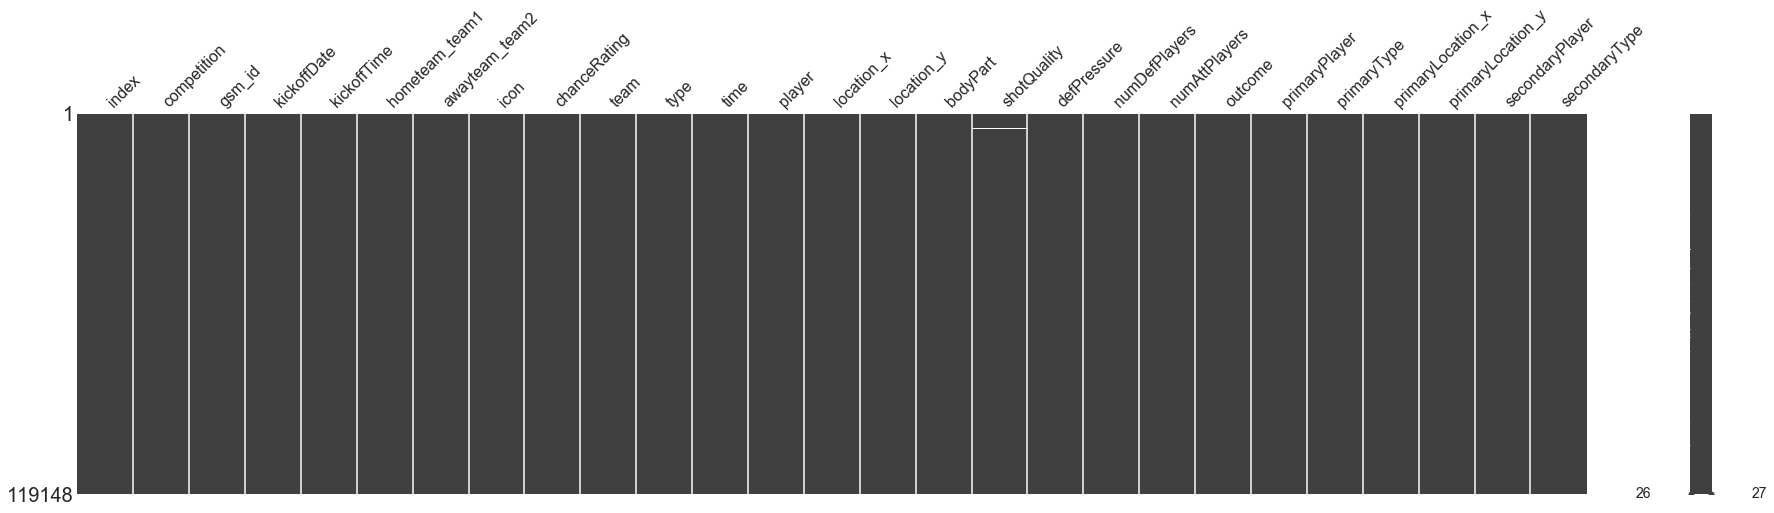

In [14]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_stratabet_chances_raw 
msno.matrix(df_stratabet_chances_raw, figsize = (30, 7))

In [15]:
# Counts of missing values
tm_null_value_stats = df_stratabet_chances_raw.isnull().sum(axis=0)
tm_null_value_stats[tm_null_value_stats != 0]

shotQuality    1530
dtype: int64

The visualisation shows us very quickly that there a few missing values in the `shotQuality` column, but otherwise the dataset is complete. This data is now ready for Data Engineering.

#### <a id='#section3.2.4'>3.2.4. Export Complete DataFrame</a>

In [16]:
df_stratabet_chances_raw.to_csv(data_dir_stratabet + '/raw/chances/' + 'stratabet_chances_all.csv', index=None, header=True)

### <a id='#section3.3'>3.3. Key Entries</a>

#### <a id='#section3.3.1'>3.3.1. Data Dictionary</a>
The [StrataBet]( http://www.stratagem.co/) Events dataset has twelve features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `eventId`    | int64     |
| `subEventName`    | object     |
| `tags`    | object     |
| `playerId`    | int64     |
| `positions`    | object     |
| `matchId`    | int64     |
| `eventName`    | object     |
| `teamId`    | int64     |
| `matchPeriod`    | object     |
| `eventSec`    | float64     |
| `subEventId`    | object     |
| `id`    | int64     |

#### <a id='#section3.3.2'>3.3.2. Import Data</a>

In [17]:
# Combine individual csv files to form one DataFrame, df_raw, using glob
lst_files_key_entries = glob.glob(data_dir_stratabet + '/raw/key_entries/individual_competitions' + "/*.csv")    # Creates a list of all csv files

li = []    # pd.concat takes a list of DataFrames as an argument

for filename in lst_files_key_entries:
    df_raw_temp = pd.read_csv(filename, index_col=None, header=0)
    li.append(df_raw_temp)

df_stratabet_key_entries_raw = pd.concat(li, axis=0, ignore_index=True)    # ignore_index=True as we don't want pandas to try an align row indexes

#### <a id='#section3.3.3'>3.3.3. Initial Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [18]:
# Display the first 5 rows of the raw DataFrame, df_stratabet_key_entries_raw 
df_stratabet_key_entries_raw.head()

,True,index,competition,gsm_id,kickoffDate,kickoffTime,hometeam_team1,awayteam_team2,team,keyentryArea,keyentryType
0,153564,9570,ScoPr,2242424,2016-08-06,11:30:00,Rangers,Hamilton Academical,Rangers,Right,Pass
1,153565,9571,ScoPr,2242424,2016-08-06,11:30:00,Rangers,Hamilton Academical,Rangers,Box,Pass
2,153566,9572,ScoPr,2242424,2016-08-06,11:30:00,Rangers,Hamilton Academical,Rangers,Right,Pass
3,153567,9573,ScoPr,2242424,2016-08-06,11:30:00,Rangers,Hamilton Academical,Hamilton Academical,Right,Pass
4,153568,9574,ScoPr,2242424,2016-08-06,11:30:00,Rangers,Hamilton Academical,Rangers,Box,Run


In [19]:
# Display the last 5 rows of the raw DataFrame, df_stratabet_key_entries_raw 
df_stratabet_key_entries_raw.tail()

,True,index,competition,gsm_id,kickoffDate,kickoffTime,hometeam_team1,awayteam_team2,team,keyentryArea,keyentryType
195682,111281,7814,GreSL,2701477,2018-03-11,15:15:00,Lamia,Levadiakos,Levadiakos,Right,Turnover
195683,111282,7815,GreSL,2701477,2018-03-11,15:15:00,Lamia,Levadiakos,Lamia,Left,Turnover
195684,111283,7816,GreSL,2701477,2018-03-11,15:15:00,Lamia,Levadiakos,Lamia,Right,Pass
195685,111284,7817,GreSL,2701477,2018-03-11,15:15:00,Lamia,Levadiakos,Lamia,Box,Pass
195686,111285,7818,GreSL,2701477,2018-03-11,15:15:00,Lamia,Levadiakos,Levadiakos,Box,Run


In [20]:
# Print the shape of the raw DataFrame, df_stratabet_key_entries_raw 
print(df_stratabet_key_entries_raw.shape)

(195687, 11)


In [21]:
# Print the column names of the raw DataFrame, df_stratabet_key_entries_raw 
print(df_stratabet_key_entries_raw.columns)

Index(['True', 'index', 'competition', 'gsm_id', 'kickoffDate', 'kickoffTime',
       'hometeam_team1', 'awayteam_team2', 'team', 'keyentryArea',
       'keyentryType'],
      dtype='object')


The dataset has six features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [22]:
# Info for the raw DataFrame, df_stratabet_key_entries_raw 
df_stratabet_key_entries_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195687 entries, 0 to 195686
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   True            195687 non-null  int64 
 1   index           195687 non-null  int64 
 2   competition     195687 non-null  object
 3   gsm_id          195687 non-null  int64 
 4   kickoffDate     195687 non-null  object
 5   kickoffTime     195687 non-null  object
 6   hometeam_team1  195687 non-null  object
 7   awayteam_team2  195687 non-null  object
 8   team            195687 non-null  object
 9   keyentryArea    195687 non-null  object
 10  keyentryType    195687 non-null  object
dtypes: int64(3), object(8)
memory usage: 16.4+ MB


In [23]:
# Description of the raw DataFrame, df_stratabet_key_entries_raw, showing some summary statistics for each numberical column in the DataFrame
df_stratabet_key_entries_raw.describe()

,True,index,gsm_id
count,195687.000000,195687.000000,1.956870e+05
mean,97843.000000,6453.847414,2.354363e+06
std,56490.115401,5040.288373,1.125099e+05
min,0.000000,0.000000,2.237445e+06
25%,48921.500000,2675.000000,2.246823e+06
50%,97843.000000,5401.000000,2.360808e+06
75%,146764.500000,8928.000000,2.467223e+06
max,195686.000000,25384.000000,2.701477e+06


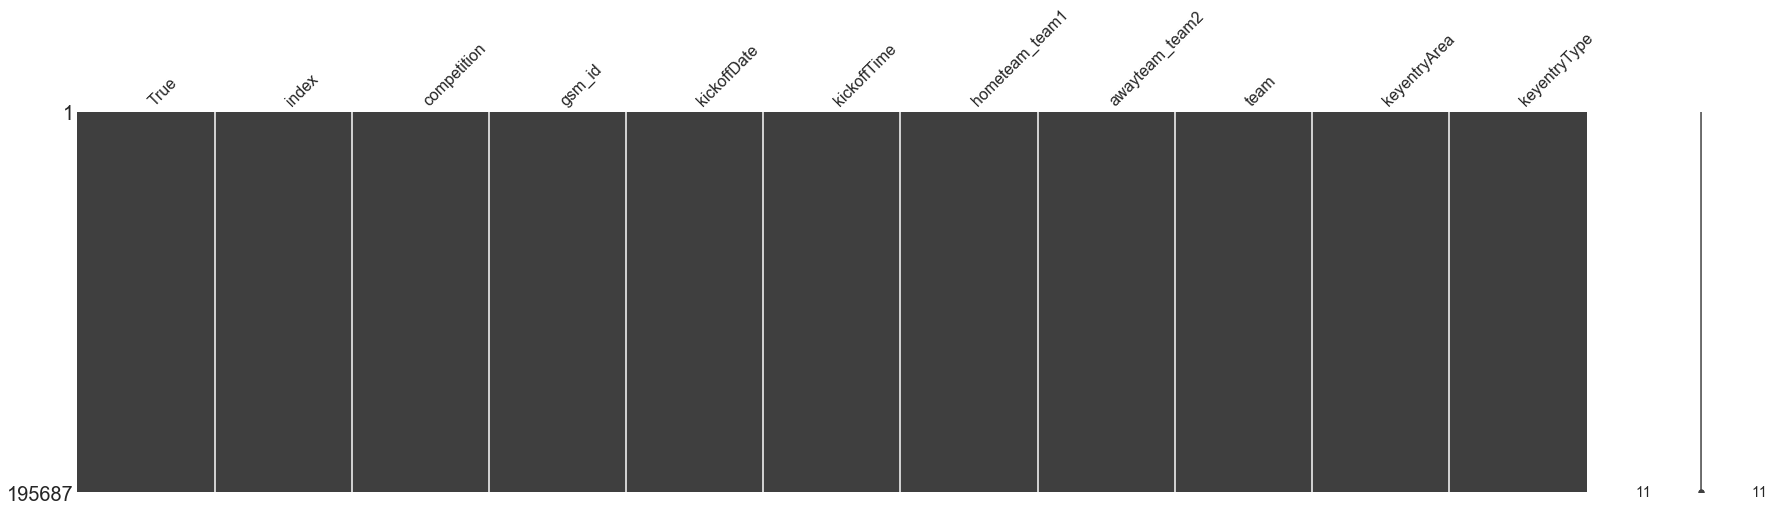

In [24]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_stratabet_key_entries_raw 
msno.matrix(df_stratabet_key_entries_raw, figsize = (30, 7))

In [25]:
# Counts of missing values
tm_null_value_stats = df_stratabet_key_entries_raw.isnull().sum(axis=0)
tm_null_value_stats[tm_null_value_stats != 0]

Series([], dtype: int64)

The visualisation shows us very quickly that there a few missing values in the `shotQuality` column, but otherwise the dataset is complete. This data is now ready for Data Engineering.

#### <a id='#section3.3.4'>3.3.4. Export Complete DataFrame</a>

In [26]:
df_stratabet_key_entries_raw.to_csv(data_dir_stratabet + '/raw/key_entries/' + 'stratabet_key_entries_all.csv', index=None, header=True)

### <a id='#section3.4'>3.4. Match Info</a>

#### <a id='#section3.4.1'>3.4.1. Data Dictionary</a>
The [StrataBet]( http://www.stratagem.co/) Events dataset has twelve features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `eventId`    | int64     |
| `subEventName`    | object     |
| `tags`    | object     |
| `playerId`    | int64     |
| `positions`    | object     |
| `matchId`    | int64     |
| `eventName`    | object     |
| `teamId`    | int64     |
| `matchPeriod`    | object     |
| `eventSec`    | float64     |
| `subEventId`    | object     |
| `id`    | int64     |

#### <a id='#section3.4.2'>3.4.2. Import Data</a>

In [27]:
# Combine individual csv files to form one DataFrame, df_raw, using glob
lst_files_key_entries = glob.glob(data_dir_stratabet + '/raw/key_entries/individual_competitions' + "/*.csv")    # Creates a list of all csv files

li = []    # pd.concat takes a list of DataFrames as an argument

for filename in lst_files_key_entries:
    df_raw_temp = pd.read_csv(filename, index_col=None, header=0)
    li.append(df_raw_temp)

df_stratabet_key_entries_raw = pd.concat(li, axis=0, ignore_index=True)    # ignore_index=True as we don't want pandas to try an align row indexes

#### <a id='#section3.4.3'>3.4.3. Initial Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [28]:
# Display the first 5 rows of the raw DataFrame, df_stratabet_key_entries_raw 
df_stratabet_key_entries_raw.head()

,True,index,competition,gsm_id,kickoffDate,kickoffTime,hometeam_team1,awayteam_team2,team,keyentryArea,keyentryType
0,153564,9570,ScoPr,2242424,2016-08-06,11:30:00,Rangers,Hamilton Academical,Rangers,Right,Pass
1,153565,9571,ScoPr,2242424,2016-08-06,11:30:00,Rangers,Hamilton Academical,Rangers,Box,Pass
2,153566,9572,ScoPr,2242424,2016-08-06,11:30:00,Rangers,Hamilton Academical,Rangers,Right,Pass
3,153567,9573,ScoPr,2242424,2016-08-06,11:30:00,Rangers,Hamilton Academical,Hamilton Academical,Right,Pass
4,153568,9574,ScoPr,2242424,2016-08-06,11:30:00,Rangers,Hamilton Academical,Rangers,Box,Run


In [29]:
# Display the last 5 rows of the raw DataFrame, df_stratabet_key_entries_raw 
df_stratabet_key_entries_raw.tail()

,True,index,competition,gsm_id,kickoffDate,kickoffTime,hometeam_team1,awayteam_team2,team,keyentryArea,keyentryType
195682,111281,7814,GreSL,2701477,2018-03-11,15:15:00,Lamia,Levadiakos,Levadiakos,Right,Turnover
195683,111282,7815,GreSL,2701477,2018-03-11,15:15:00,Lamia,Levadiakos,Lamia,Left,Turnover
195684,111283,7816,GreSL,2701477,2018-03-11,15:15:00,Lamia,Levadiakos,Lamia,Right,Pass
195685,111284,7817,GreSL,2701477,2018-03-11,15:15:00,Lamia,Levadiakos,Lamia,Box,Pass
195686,111285,7818,GreSL,2701477,2018-03-11,15:15:00,Lamia,Levadiakos,Levadiakos,Box,Run


In [30]:
# Print the shape of the raw DataFrame, df_stratabet_key_entries_raw 
print(df_stratabet_key_entries_raw.shape)

(195687, 11)


In [31]:
# Print the column names of the raw DataFrame, df_stratabet_key_entries_raw 
print(df_stratabet_key_entries_raw.columns)

Index(['True', 'index', 'competition', 'gsm_id', 'kickoffDate', 'kickoffTime',
       'hometeam_team1', 'awayteam_team2', 'team', 'keyentryArea',
       'keyentryType'],
      dtype='object')


The dataset has six features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [32]:
# Info for the raw DataFrame, df_stratabet_key_entries_raw 
df_stratabet_key_entries_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195687 entries, 0 to 195686
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   True            195687 non-null  int64 
 1   index           195687 non-null  int64 
 2   competition     195687 non-null  object
 3   gsm_id          195687 non-null  int64 
 4   kickoffDate     195687 non-null  object
 5   kickoffTime     195687 non-null  object
 6   hometeam_team1  195687 non-null  object
 7   awayteam_team2  195687 non-null  object
 8   team            195687 non-null  object
 9   keyentryArea    195687 non-null  object
 10  keyentryType    195687 non-null  object
dtypes: int64(3), object(8)
memory usage: 16.4+ MB


In [33]:
# Description of the raw DataFrame, df_stratabet_key_entries_raw, showing some summary statistics for each numberical column in the DataFrame
df_stratabet_key_entries_raw.describe()

,True,index,gsm_id
count,195687.000000,195687.000000,1.956870e+05
mean,97843.000000,6453.847414,2.354363e+06
std,56490.115401,5040.288373,1.125099e+05
min,0.000000,0.000000,2.237445e+06
25%,48921.500000,2675.000000,2.246823e+06
50%,97843.000000,5401.000000,2.360808e+06
75%,146764.500000,8928.000000,2.467223e+06
max,195686.000000,25384.000000,2.701477e+06


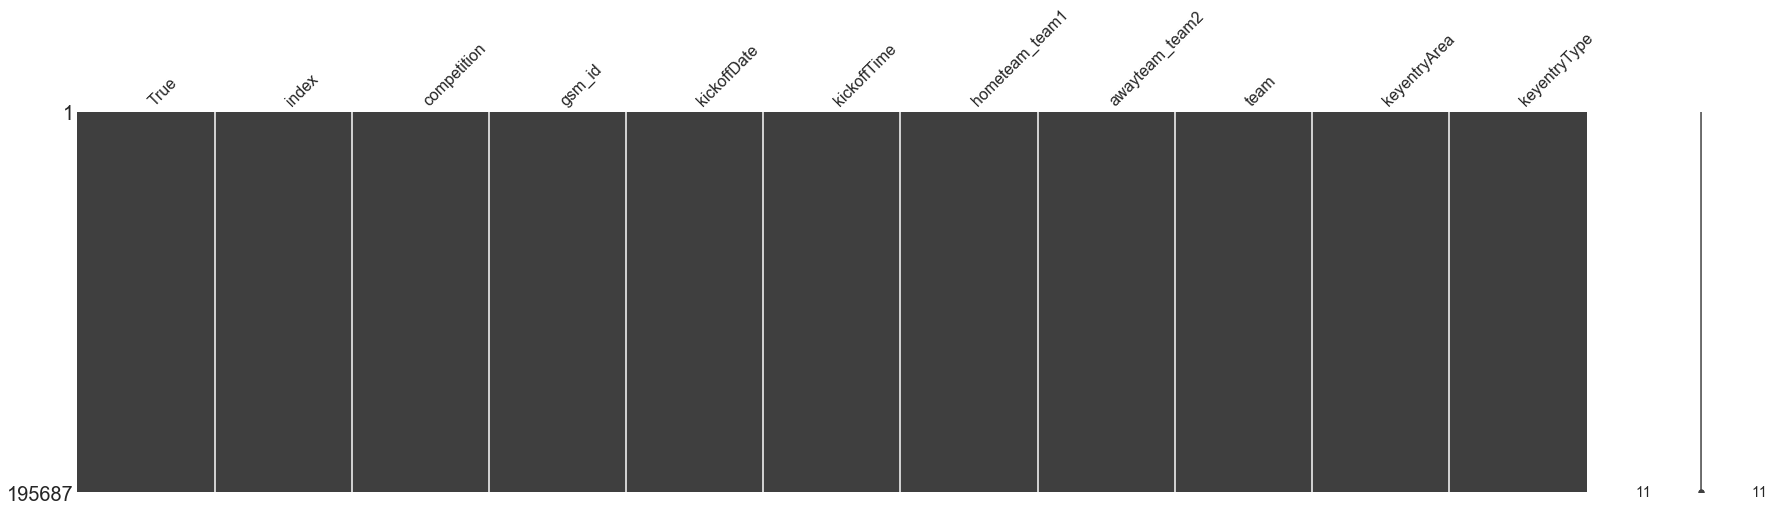

In [34]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_stratabet_key_entries_raw 
msno.matrix(df_stratabet_key_entries_raw, figsize = (30, 7))

In [35]:
# Counts of missing values
tm_null_value_stats = df_stratabet_key_entries_raw.isnull().sum(axis=0)
tm_null_value_stats[tm_null_value_stats != 0]

Series([], dtype: int64)

The visualisation shows us very quickly that there a few missing values in the `shotQuality` column, but otherwise the dataset is complete. This data is now ready for Data Engineering.

#### <a id='#section3.4.4'>3.2.4. Export Complete DataFrame</a>

In [36]:
df_stratabet_key_entries_raw.to_csv(data_dir_stratabet + '/raw/key_entries/' + 'stratabet_key_entries_all.csv', index=None, header=True)

### <a id='#section3.5'>3.5. Minutes Played</a>

#### <a id='#section3.5.1'>3.5.1. Data Dictionary</a>
The [StrataBet]( http://www.stratagem.co/) Events dataset has twelve features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `eventId`    | int64     |
| `subEventName`    | object     |
| `tags`    | object     |
| `playerId`    | int64     |
| `positions`    | object     |
| `matchId`    | int64     |
| `eventName`    | object     |
| `teamId`    | int64     |
| `matchPeriod`    | object     |
| `eventSec`    | float64     |
| `subEventId`    | object     |
| `id`    | int64     |

#### <a id='#section3.5.2'>3.5.2. Import Data</a>

In [37]:
# Combine individual csv files to form one DataFrame, df_raw, using glob
lst_files_key_entries = glob.glob(data_dir_stratabet + '/raw/key_entries/individual_competitions' + "/*.csv")    # Creates a list of all csv files

li = []    # pd.concat takes a list of DataFrames as an argument

for filename in lst_files_key_entries:
    df_raw_temp = pd.read_csv(filename, index_col=None, header=0)
    li.append(df_raw_temp)

df_stratabet_key_entries_raw = pd.concat(li, axis=0, ignore_index=True)    # ignore_index=True as we don't want pandas to try an align row indexes

#### <a id='#section3.5.3'>3.5.3. Initial Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [38]:
# Display the first 5 rows of the raw DataFrame, df_stratabet_key_entries_raw 
df_stratabet_key_entries_raw.head()

,True,index,competition,gsm_id,kickoffDate,kickoffTime,hometeam_team1,awayteam_team2,team,keyentryArea,keyentryType
0,153564,9570,ScoPr,2242424,2016-08-06,11:30:00,Rangers,Hamilton Academical,Rangers,Right,Pass
1,153565,9571,ScoPr,2242424,2016-08-06,11:30:00,Rangers,Hamilton Academical,Rangers,Box,Pass
2,153566,9572,ScoPr,2242424,2016-08-06,11:30:00,Rangers,Hamilton Academical,Rangers,Right,Pass
3,153567,9573,ScoPr,2242424,2016-08-06,11:30:00,Rangers,Hamilton Academical,Hamilton Academical,Right,Pass
4,153568,9574,ScoPr,2242424,2016-08-06,11:30:00,Rangers,Hamilton Academical,Rangers,Box,Run


In [39]:
# Display the last 5 rows of the raw DataFrame, df_stratabet_key_entries_raw 
df_stratabet_key_entries_raw.tail()

,True,index,competition,gsm_id,kickoffDate,kickoffTime,hometeam_team1,awayteam_team2,team,keyentryArea,keyentryType
195682,111281,7814,GreSL,2701477,2018-03-11,15:15:00,Lamia,Levadiakos,Levadiakos,Right,Turnover
195683,111282,7815,GreSL,2701477,2018-03-11,15:15:00,Lamia,Levadiakos,Lamia,Left,Turnover
195684,111283,7816,GreSL,2701477,2018-03-11,15:15:00,Lamia,Levadiakos,Lamia,Right,Pass
195685,111284,7817,GreSL,2701477,2018-03-11,15:15:00,Lamia,Levadiakos,Lamia,Box,Pass
195686,111285,7818,GreSL,2701477,2018-03-11,15:15:00,Lamia,Levadiakos,Levadiakos,Box,Run


In [40]:
# Print the shape of the raw DataFrame, df_stratabet_key_entries_raw 
print(df_stratabet_key_entries_raw.shape)

(195687, 11)


In [41]:
# Print the column names of the raw DataFrame, df_stratabet_key_entries_raw 
print(df_stratabet_key_entries_raw.columns)

Index(['True', 'index', 'competition', 'gsm_id', 'kickoffDate', 'kickoffTime',
       'hometeam_team1', 'awayteam_team2', 'team', 'keyentryArea',
       'keyentryType'],
      dtype='object')


The dataset has six features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [42]:
# Info for the raw DataFrame, df_stratabet_key_entries_raw 
df_stratabet_key_entries_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195687 entries, 0 to 195686
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   True            195687 non-null  int64 
 1   index           195687 non-null  int64 
 2   competition     195687 non-null  object
 3   gsm_id          195687 non-null  int64 
 4   kickoffDate     195687 non-null  object
 5   kickoffTime     195687 non-null  object
 6   hometeam_team1  195687 non-null  object
 7   awayteam_team2  195687 non-null  object
 8   team            195687 non-null  object
 9   keyentryArea    195687 non-null  object
 10  keyentryType    195687 non-null  object
dtypes: int64(3), object(8)
memory usage: 16.4+ MB


In [43]:
# Description of the raw DataFrame, df_stratabet_key_entries_raw, showing some summary statistics for each numberical column in the DataFrame
df_stratabet_key_entries_raw.describe()

,True,index,gsm_id
count,195687.000000,195687.000000,1.956870e+05
mean,97843.000000,6453.847414,2.354363e+06
std,56490.115401,5040.288373,1.125099e+05
min,0.000000,0.000000,2.237445e+06
25%,48921.500000,2675.000000,2.246823e+06
50%,97843.000000,5401.000000,2.360808e+06
75%,146764.500000,8928.000000,2.467223e+06
max,195686.000000,25384.000000,2.701477e+06


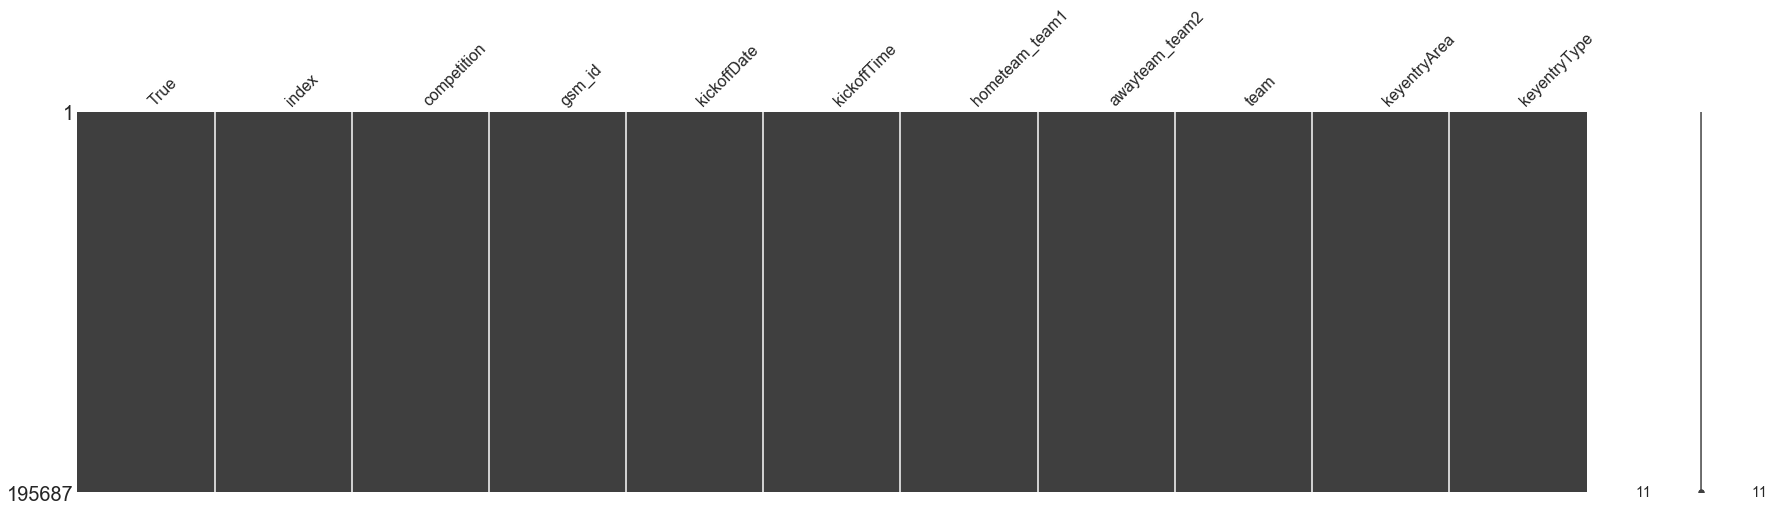

In [44]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_stratabet_key_entries_raw 
msno.matrix(df_stratabet_key_entries_raw, figsize = (30, 7))

In [45]:
# Counts of missing values
tm_null_value_stats = df_stratabet_key_entries_raw.isnull().sum(axis=0)
tm_null_value_stats[tm_null_value_stats != 0]

Series([], dtype: int64)

The visualisation shows us very quickly that there a few missing values in the `shotQuality` column, but otherwise the dataset is complete. This data is now ready for Data Engineering.

#### <a id='#section3.5.4'>3.5.4. Export Complete DataFrame</a>

In [46]:
df_stratabet_key_entries_raw.to_csv(data_dir_stratabet + '/raw/key_entries/' + 'stratabet_key_entries_all.csv', index=None, header=True)

---

## <a id='#section4'>4. Data Engineering</a>

### <a id='#section4.1'>4.1. Chances</a>

#### <a id='#section4.1.1'>4.1.1. Assign Raw DataFrame to Engineered DataFrame</a>

In [47]:
# Assign Raw DataFrame to Engineered DataFrame
df_stratabet_chances = df_stratabet_chances_raw

#### <a id='#section4.1.2'>4.1.2. Create `Full_Fixture_Date` Attribute</a>

In [48]:
df_stratabet_chances.head()

,index,competition,gsm_id,kickoffDate,kickoffTime,hometeam_team1,awayteam_team2,icon,chanceRating,team,type,time,player,location_x,location_y,bodyPart,shotQuality,defPressure,numDefPlayers,numAttPlayers,outcome,primaryPlayer,primaryType,primaryLocation_x,primaryLocation_y,secondaryPlayer,secondaryType
0,4684,GreSL,2355591,10/09/2016,13:00:00,Kerkyra,Platanias,poorchance,poorchance,Kerkyra,Open Play,24:43:00,D. Epstein,81,48,Left,3,5,2,0,Saved,-,-,-,-,-,-
1,4685,GreSL,2355591,10/09/2016,13:00:00,Kerkyra,Platanias,goodchance,goodchance,Kerkyra,Open Play,45:29:00,D. Epstein,27,60,Left,2,2,2,0,Defended,Thuram,Open Play Pass,-29,82,-,-
2,4686,GreSL,2355591,10/09/2016,13:00:00,Kerkyra,Platanias,poorchance,poorchance,Kerkyra,Open Play,44:34:00,S. Siontis,23,117,Right,2,1,4,1,Missed,-,-,-,-,-,-
3,4687,GreSL,2355591,10/09/2016,13:00:00,Kerkyra,Platanias,poorchance,poorchance,Platanias,Open Play,42:39:00,O. Gnjatic,-9,118,Left,1,1,3,1,Missed,G. Manousos,Open Play Pass,77,92,-,-
4,4688,GreSL,2355591,10/09/2016,13:00:00,Kerkyra,Platanias,goodchance,goodchance,Kerkyra,Open Play,40:46:00,D. Epstein,42,15,Left,2,5,2,0,Saved,-,-,-,-,-,-


In [49]:
df_stratabet_chances['Full_Fixture_Date'] = df_stratabet_chances['kickoffDate'].astype(str) + ' ' + df_stratabet_chances['hometeam_team1'].astype(str) + ' vs. ' + df_stratabet_chances['awayteam_team2'].astype(str)

#### <a id='#section4.1.3'>4.1.3. Convert Data Types</a>

In [50]:
df_stratabet_chances['location_x'] = df_stratabet_chances['location_x'].apply(pd.to_numeric, errors='coerce')
df_stratabet_chances['location_y'] = df_stratabet_chances['location_y'].apply(pd.to_numeric, errors='coerce')
df_stratabet_chances['primaryLocation_x'] = df_stratabet_chances['primaryLocation_x'].apply(pd.to_numeric, errors='coerce')
df_stratabet_chances['primaryLocation_y'] = df_stratabet_chances['primaryLocation_y'].apply(pd.to_numeric, errors='coerce')
df_stratabet_chances['shotQuality'] = df_stratabet_chances['shotQuality'].apply(pd.to_numeric, errors='coerce')
df_stratabet_chances['defPressure'] = df_stratabet_chances['defPressure'].apply(pd.to_numeric, errors='coerce')
df_stratabet_chances['numDefPlayers'] = df_stratabet_chances['numDefPlayers'].apply(pd.to_numeric, errors='coerce')
df_stratabet_chances['numAttPlayers'] = df_stratabet_chances['numAttPlayers'].apply(pd.to_numeric, errors='coerce')

#### <a id='#section4.1.4'>4.1.4. Convert X, Y Coordinates to Standardised Coordiantes</a>

From the documenation, the XY coordinates in addition to grid locations, with (0,0) representing the absolute centre of the defended goal line. The pitch length runs from 0 to 420, while the width runs from 136 to -136 (left to right).

Some key reference points of note:
*    Left Goalpost (15, 0)
*    Right Goalpost (-15, 0)
*    6-Yard Box Left Corner: (37, 22)
*    6-Yard Box Right Corner: (-37, 22)
*    Penalty Spot: (0, 44)
*    18-Yard Box Left Corner: (81, 66)
*    18-Yard Box Right Corner: (-81, 66)
*    Centre Spot: (0, 210) 

In [51]:
df_stratabet_chances['location_y_120'] = ((df_stratabet_chances['location_y'] / 480) * 120).round(2)
df_stratabet_chances['location_x_80'] = (((df_stratabet_chances['location_x'] + 136) / 272) * 80).round(2)
df_stratabet_chances['primaryLocation_y_120'] = ((df_stratabet_chances['primaryLocation_y'] / 480) * 120).round(2)
df_stratabet_chances['primaryLocation_x_80'] = (((df_stratabet_chances['primaryLocation_x'] + 136) / 272) * 80).round(2)

In [52]:
df_stratabet_chances.head()

,index,competition,gsm_id,kickoffDate,kickoffTime,hometeam_team1,awayteam_team2,icon,chanceRating,team,type,time,player,location_x,location_y,bodyPart,shotQuality,defPressure,numDefPlayers,numAttPlayers,outcome,primaryPlayer,primaryType,primaryLocation_x,primaryLocation_y,secondaryPlayer,secondaryType,Full_Fixture_Date,location_y_120,location_x_80,primaryLocation_y_120,primaryLocation_x_80
0,4684,GreSL,2355591,10/09/2016,13:00:00,Kerkyra,Platanias,poorchance,poorchance,Kerkyra,Open Play,24:43:00,D. Epstein,81.0,48.0,Left,3.0,5.0,2.0,0.0,Saved,-,-,NaN,NaN,-,-,10/09/2016 Kerkyra vs. Platanias,12.00,63.82,NaN,NaN
1,4685,GreSL,2355591,10/09/2016,13:00:00,Kerkyra,Platanias,goodchance,goodchance,Kerkyra,Open Play,45:29:00,D. Epstein,27.0,60.0,Left,2.0,2.0,2.0,0.0,Defended,Thuram,Open Play Pass,-29.0,82.0,-,-,10/09/2016 Kerkyra vs. Platanias,15.00,47.94,20.5,31.47
2,4686,GreSL,2355591,10/09/2016,13:00:00,Kerkyra,Platanias,poorchance,poorchance,Kerkyra,Open Play,44:34:00,S. Siontis,23.0,117.0,Right,2.0,1.0,4.0,1.0,Missed,-,-,NaN,NaN,-,-,10/09/2016 Kerkyra vs. Platanias,29.25,46.76,NaN,NaN
3,4687,GreSL,2355591,10/09/2016,13:00:00,Kerkyra,Platanias,poorchance,poorchance,Platanias,Open Play,42:39:00,O. Gnjatic,-9.0,118.0,Left,1.0,1.0,3.0,1.0,Missed,G. Manousos,Open Play Pass,77.0,92.0,-,-,10/09/2016 Kerkyra vs. Platanias,29.50,37.35,23.0,62.65
4,4688,GreSL,2355591,10/09/2016,13:00:00,Kerkyra,Platanias,goodchance,goodchance,Kerkyra,Open Play,40:46:00,D. Epstein,42.0,15.0,Left,2.0,5.0,2.0,0.0,Saved,-,-,NaN,NaN,-,-,10/09/2016 Kerkyra vs. Platanias,3.75,52.35,NaN,NaN


In [53]:
df_stratabet_chances['location_y_120_inv'] = 120 - ((df_stratabet_chances['location_y'] / 480) * 120).round(2)
df_stratabet_chances['location_x_80_inv'] = 80 - (((df_stratabet_chances['location_x'] + 136) / 272) * 80).round(2)
df_stratabet_chances['primaryLocation_y_120_inv'] = 120 -  ((df_stratabet_chances['primaryLocation_y'] / 480) * 120).round(2)
df_stratabet_chances['primaryLocation_x_80_inv'] = 80 - (((df_stratabet_chances['primaryLocation_x'] + 136) / 272) * 80).round(2)

#### <a id='#section4.1.5'>4.1.5. Renaming</a>

In [54]:
df_stratabet_chances = df_stratabet_chances.rename(columns = {'index':'id'})

#### <a id='#section4.1.6'>4.1.6. Assign New Attributes</a>

##### Season

In [55]:
df_stratabet_chances['Season'] = 'TO ADD'

In [56]:
# Write code here to add seasons for each match per 'competition' and 'kickoffDate' - varies per league

#### <a id='#section4.1.7'>4.1.7. Create DataFrame of Teams and Leagues</a>

In [68]:
# Create DataFrame of Teams and Leagues

## Select columns of interest
cols = ['competition', 'team']
df_stratabet_teams_leagues = df_stratabet_chances[cols]

## Drop duplicates
df_stratabet_teams_leagues = df_stratabet_teams_leagues.drop_duplicates()

## Order columns by league and team
df_stratabet_teams_leagues = df_stratabet_teams_leagues.sort_values(['competition', 'team'], ascending=[True, True])

## Display DataFrame
df_stratabet_teams_leagues.head()

,competition,team
77137,AusAL,Adelaide United
77053,AusAL,Brisbane Roar
77104,AusAL,Central Coast Mariners
77066,AusAL,Melbourne City
77052,AusAL,Melbourne Victory


In [69]:
# Export DataFrame
df_stratabet_teams_leagues.to_csv(data_dir_stratabet + '/reference/teams_leagues.csv', index=None, header=True)

#### <a id='#section4.1.8'>4.1.8. Export DataFrame</a>

In [64]:
df_stratabet_chances.to_csv(data_dir_stratabet + '/engineered/chances/stratabet_chances_all.csv', index=None, header=True)

In [65]:
df_stratabet_chances.to_csv(data_dir + '/export/stratabet_events_chances.csv', index=None, header=True)

In [66]:
df_stratabet_chances.head()

,id,competition,gsm_id,kickoffDate,kickoffTime,hometeam_team1,awayteam_team2,icon,chanceRating,team,type,time,player,location_x,location_y,bodyPart,shotQuality,defPressure,numDefPlayers,numAttPlayers,outcome,primaryPlayer,primaryType,primaryLocation_x,primaryLocation_y,secondaryPlayer,secondaryType,Full_Fixture_Date,location_y_120,location_x_80,primaryLocation_y_120,primaryLocation_x_80,location_y_120_inv,location_x_80_inv,primaryLocation_y_120_inv,primaryLocation_x_80_inv,Season
0,4684,GreSL,2355591,10/09/2016,13:00:00,Kerkyra,Platanias,poorchance,poorchance,Kerkyra,Open Play,24:43:00,D. Epstein,81.0,48.0,Left,3.0,5.0,2.0,0.0,Saved,-,-,NaN,NaN,-,-,10/09/2016 Kerkyra vs. Platanias,12.00,63.82,NaN,NaN,108.00,16.18,NaN,NaN,TO ADD
1,4685,GreSL,2355591,10/09/2016,13:00:00,Kerkyra,Platanias,goodchance,goodchance,Kerkyra,Open Play,45:29:00,D. Epstein,27.0,60.0,Left,2.0,2.0,2.0,0.0,Defended,Thuram,Open Play Pass,-29.0,82.0,-,-,10/09/2016 Kerkyra vs. Platanias,15.00,47.94,20.5,31.47,105.00,32.06,99.5,48.53,TO ADD
2,4686,GreSL,2355591,10/09/2016,13:00:00,Kerkyra,Platanias,poorchance,poorchance,Kerkyra,Open Play,44:34:00,S. Siontis,23.0,117.0,Right,2.0,1.0,4.0,1.0,Missed,-,-,NaN,NaN,-,-,10/09/2016 Kerkyra vs. Platanias,29.25,46.76,NaN,NaN,90.75,33.24,NaN,NaN,TO ADD
3,4687,GreSL,2355591,10/09/2016,13:00:00,Kerkyra,Platanias,poorchance,poorchance,Platanias,Open Play,42:39:00,O. Gnjatic,-9.0,118.0,Left,1.0,1.0,3.0,1.0,Missed,G. Manousos,Open Play Pass,77.0,92.0,-,-,10/09/2016 Kerkyra vs. Platanias,29.50,37.35,23.0,62.65,90.50,42.65,97.0,17.35,TO ADD
4,4688,GreSL,2355591,10/09/2016,13:00:00,Kerkyra,Platanias,goodchance,goodchance,Kerkyra,Open Play,40:46:00,D. Epstein,42.0,15.0,Left,2.0,5.0,2.0,0.0,Saved,-,-,NaN,NaN,-,-,10/09/2016 Kerkyra vs. Platanias,3.75,52.35,NaN,NaN,116.25,27.65,NaN,NaN,TO ADD


In [67]:
df_stratabet_chances.shape

(119148, 37)

In [ ]:
# All code below here is old and needs to be sorted

### <a id='#section4.2'>4.2. Key Entries</a>

In [ ]:
# Add code here

### <a id='#section4.3'>4.3. Match Info</a>

In [ ]:
# Add code here

### <a id='#section4.4'>4.4. Minutes Played</a>

In [ ]:
# Add code here

In [ ]:
# Old code from here

### <a id='#section4.3'>4.3. String Cleaning</a>

##### Split `Label` column into seperate `Fixture` and `Score` columns

In [ ]:
# Break down 'Label' column into constituent parts - Fixtures, Score, Date, Home Goals, Away Goals, etc.
df_stratabet['fixture'] = df_stratabet['label'].str.split(', ').str[0]
df_stratabet['score_home_away'] = df_stratabet['label'].str.split(', ').str[1]
df_stratabet['team_home'] = df_stratabet['fixture'].str.split(' - ').str[0]
df_stratabet['team_away'] = df_stratabet['fixture'].str.split(' - ').str[1]
df_stratabet['goals_home'] = df_stratabet['score_home_away'].str.split(' - ').str[0]
df_stratabet['goals_away'] = df_stratabet['score_home_away'].str.split(' - ').str[1]

##### Split `date` column into seperate `date_isolated` and `time_isolated` columns

In [ ]:
df_stratabet['date_isolated'] = df_stratabet['date'].str.split(' at').str[0]
df_stratabet['time_isolated'] = df_stratabet['date'].str.split(' at ').str[1]
df_stratabet['date_time_isolated'] = df_stratabet['date'].str.split(' GMT').str[0].str.replace(' at ', ' ', regex=True)

### <a id='#section4.4'>4.4. Drop columns</a>
As this is a large dataset with >3mil rows, we will remove every column that is not required at this stage.

In [ ]:
# Display columns
df_stratabet.columns

In [ ]:
# df_stratabet = df_stratabet.drop(['tags', 'dateutc', 'wyId_x', 'label', 'date', 'referees', 'wyId_y', 'date_isolated', 'time_isolated', 'date_time_isolated'])

### <a id='#section4.5'>4.5. Create New Attributes</a>

##### Create full fixture data from broken down attributes created in section 4.2.

In [ ]:
df_stratabet['full_fixture_date'] = df_stratabet['date_date'].astype(str) + ' ' + df_stratabet['team_home'].astype(str)  + ' ' + df_stratabet['goals_home'].astype(str) + ' ' + ' v ' + ' ' + df_stratabet['goals_away'].astype(str) + ' ' + df_stratabet['team_away'].astype(str) 

##### Create 'season' attribute

In [ ]:
df_stratabet['season'] = '17/18'

### <a id='#section4.5'>4.5. Reorder DataFrame</a>
Correctly order all the rows in the DataFrame by date, time, country, fixture, half, and time in the match. Important when looking at events and the following event e.g. is possession retains? Which player receives the pass, etc.

In [ ]:
df_stratabet = df_stratabet.sort_values(['date_date', 'time_time', 'country', 'league_name', 'full_fixture_date', 'matchPeriod', 'eventSec'], ascending=[True, True, True, True, True, True, True])

### <a id='#section4.6'>4.6. Create New Attributes</a>

##### Create `followingPossession` column
'teamIdNext' = following 'teamId'

In [ ]:
df_stratabet['teamIdNext'] = df_stratabet['teamId'].shift(-1)
df_stratabet['teamNameNext'] = df_stratabet['teamName'].shift(-1)
df_stratabet['fullNameNext'] = df_stratabet['fullName'].shift(-1)

In [ ]:
df_stratabet.head()

##### Create `player2player` column

In [ ]:
df_stratabet['player2player'] = df_stratabet['fullName'] + ' - ' + df_stratabet['fullNameNext']

##### Create `isPossessionRetained` column
When `teamId` is not followed by the same `teamId` in the following row, possession is lost. We want to creat a column that stats this.

In [ ]:
df_stratabet['isPossessionRetained'] = np.where(df_stratabet['teamId'] == df_stratabet['teamIdNext'], True, False)

##### Clean Positions data

In [ ]:
# CODE HERE

### <a id='#section4.7'>4.7. Export DataFrame</a>

##### Break down data into individual matches

In [ ]:
lst_results = list(df_stratabet['full_fixture_date'].unique())

In [ ]:
for i, g in df_stratabet.groupby('full_fixture_date'):
    g.to_csv(data_dir_wyscout + '/engineered/individual_matches/{}.csv'.format(i), header=True, index_label=True)

##### Complete dataset

In [ ]:
df_stratabet.to_csv(data_dir_wyscout + '/engineered/combined/wyscout_events_big5_1718.csv', index=None, header=True)

### <a id='#section4.8'>4.8. Aggregate Data</a>

#### <a id='#section4.8.1'>4.8.1. Fixture Level</a>

In [ ]:
# Select columns of interest

## Define columns
cols = ['season',
        'date_time_timestamp',
        'fixture',
        'team_home',
        'team_away',
        'teamName',
        'goals_home',
        'goals_away',
        'eventName',
        'subEventName'
       ]

## Streamline DataFrame with columns of interest
df_stratabet_select = df_stratabet[cols]

## 
df_stratabet_select['Opponent'] = np.where(df_stratabet_select['team_home'] == df_stratabet_select['teamName'], df_stratabet_select['team_away'], df_stratabet_select['team_home'])

In [ ]:
#

## Group DataFrame and Aggregate on 'eventName'
df_stratabet_fixture_grouped = (df_stratabet_select
                                  .groupby(['season', 'date_time_timestamp', 'fixture', 'teamName', 'Opponent', 'goals_home', 'goals_away', 'eventName'])
                                  .agg({'eventName': ['count']})
                             )

## Drop level
df_stratabet_fixture_grouped.columns = df_stratabet_fixture_grouped.columns.droplevel(level=0)


## Reset index
df_stratabet_fixture_grouped = df_stratabet_fixture_grouped.reset_index()

## Rename columns
df_stratabet_fixture_grouped = df_stratabet_fixture_grouped.rename(columns={'season': 'Season',
                                                                        'date_time_timestamp': 'Date',
                                                                        'fixture': 'Fixture',
                                                                        'teamName': 'Team',
                                                                        'Opponent': 'Opponent',
                                                                        'goals_home': 'Goals_Home',
                                                                        'goals_away': 'Goals_Away',
                                                                        'eventName': 'Event',
                                                                        'count': 'Team_Value'
                                                                       }
                                                              )

## Display DataFrame
df_stratabet_fixture_grouped.head()

In [ ]:
# Select columns of interest

## Define columns
cols = ['Season',
        'Date',
        'Fixture',
        'Team',
        'Opponent',
        'Event',
        'Team_Value'
       ]

## Streamline DataFrame with columns of interest
df_stratabet_fixture_grouped_select = df_stratabet_fixture_grouped[cols]

In [ ]:
# Join DataFrame to itself on 'Date', 'Fixture', 'Team'/'Opponent', and 'Event', to join Team and Opponent together
df_stratabet_fixture_grouped = pd.merge(df_stratabet_fixture_grouped, df_stratabet_fixture_grouped,  how='left', left_on=['Season', 'Date', 'Fixture', 'Opponent', 'Event'], right_on = ['Season', 'Date', 'Fixture', 'Team', 'Event'])

In [ ]:
# Clean Data

## Drop columns
df_stratabet_fixture_grouped = df_stratabet_fixture_grouped.drop(columns=['Team_y', 'Opponent_y', 'Goals_Home_y', 'Goals_Away_y'])

## Rename columns
df_stratabet_fixture_grouped = df_stratabet_fixture_grouped.rename(columns={'Season_x': 'Season',
                                                                        'Team_x': 'Team',
                                                                        'Opponent_x': 'Opponent',
                                                                        'Goals_Home_x': 'Goals_Home',
                                                                        'Goals_Away_x': 'Goals_Away',
                                                                        'Team_Value_x': 'Team_Value',
                                                                        'Team_Value_y': 'Opponent_Value',
                                                                       }
                                                                  )

## Replace null values with zeros
df_stratabet_fixture_grouped['Team_Value'] = df_stratabet_fixture_grouped['Team_Value'].replace(np.nan, 0)
df_stratabet_fixture_grouped['Opponent_Value'] = df_stratabet_fixture_grouped['Opponent_Value'].replace(np.nan, 0)

## Convert Opponent_Value' from Float64 to Int64 type
df_stratabet_fixture_grouped['Opponent_Value'] = df_stratabet_fixture_grouped['Opponent_Value'].astype('Int64')

## Display DataFrame
df_stratabet_fixture_grouped.head()

In [ ]:
#

##
df_fixture_gw = (df_stratabet_fixture_grouped
                     .groupby(['Date', 'Team'])
                     .agg({'Team': ['nunique']})
                )

##
df_fixture_gw.columns = df_fixture_gw.columns.droplevel(level=0)


##
df_fixture_gw = df_fixture_gw.reset_index()

##
df_fixture_gw = df_fixture_gw.rename(columns={'Date': 'Date',
                                              'nunique': 'Gameweek',
                                             }
                                    )

## Groupby. See: https://stackoverflow.com/questions/18554920/pandas-aggregate-count-distinct
df_fixture_gw = (df_fixture_gw.groupby(['Team', 'Date']).sum()
                              .groupby(level=0).cumsum().reset_index()
                )

## Display DataFrame
df_fixture_gw.head()

In [ ]:
# Join DataFrame 
df_stratabet_fixture_grouped = pd.merge(df_stratabet_fixture_grouped, df_fixture_gw, how='left', left_on=['Date', 'Team'], right_on = ['Date', 'Team'])

# Display DataFrame
df_stratabet_fixture_grouped.head(50)

##### Export DataFrame

In [ ]:
df_stratabet_fixture_grouped.to_csv(data_dir_wyscout + '/engineered/combined/wyscout_aggregated_fixtures_big5_1718.csv', index=None, header=True)

#### <a id='#section4.8.2'>4.8.2. Team Level</a>

In [ ]:
# Group DataFrame by Team

##
df_stratabet_team_grouped = (df_stratabet_fixture_grouped
                               .groupby(['Team', 'Event'])
                               .agg({'Team_Value': ['sum'],
                                     'Opponent_Value': ['sum']
                                    }
                                   )
                          )

##
df_stratabet_team_grouped.columns = df_stratabet_team_grouped.columns.droplevel(level=0)

##
df_stratabet_team_grouped = df_stratabet_team_grouped.reset_index()

## Rename columns
df_stratabet_team_grouped.columns = ['Team', 'Event', 'Team_Value', 'Opponent_Value']

## Display columns
df_stratabet_team_grouped.head()

##### Export DataFrame

In [ ]:
df_stratabet_team_grouped.to_csv(data_dir_wyscout + '/engineered/combined/wyscout_aggregated_team_big5_1718.csv', index=None, header=True)

---

## <a id='#section5'>5. Exploratory Data Analysis</a>
...

---

## <a id='#section6'>6. Summary</a>
This notebook scrapes data for player valuations using [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) from [TransferMarkt](https://www.transfermarkt.co.uk/) using [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames and [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping.

---

## <a id='#section7'>7. Next Steps</a>
...

---

## <a id='#section8'>8. References</a>
...

---
<b>This article was written with the aid of StrataData, which is property of [Stratagem Technologies](http://www.stratagem.co/). StrataData powers the [StrataBet Sports Trading Platform](http://www.stratabet.com/), in addition to [StrataBet Premium Recommendations](http://app.stratabet.com/recommendations).</b>

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)